In [11]:
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [53]:
Xtrain_raw = pd.read_csv("data/x_train.csv", index_col="ID")
Xtrain_raw

,Humidity,M12,M13,M14,M15,M4,M5,M6,M7,R,S1,S2,S3
ID,,,,,,,,,,,,,
0,0.098160,-0.175981,-0.086469,-0.041465,-2.115256e-02,0.197597,0.054646,-0.009277,0.001855,1.007242,1.013007,1.000563,0.999397
1,0.000307,-0.066416,0.036071,0.032636,-5.725724e-04,2.568494,1.883142,0.779251,0.262231,0.971428,0.996735,1.002226,1.013063
2,0.000388,0.190943,0.187540,0.143680,9.263546e-02,-0.147460,-0.021174,0.040079,0.065790,1.302238,0.905275,0.953600,0.986347
3,0.761003,-0.151393,-0.083723,-0.048982,-1.825867e-02,0.045380,0.102427,0.012915,0.004453,1.013741,1.004315,1.012301,1.009465
4,0.107808,0.074818,0.042692,0.026169,1.913369e-02,-0.056284,-0.011193,0.010233,0.012205,0.998659,1.005154,1.000096,0.999553
...,...,...,...,...,...,...,...,...,...,...,...,...,...
202928,0.000393,0.044343,0.020466,0.018760,2.282731e-08,-0.067794,-0.005543,-0.012791,-0.011086,0.999831,0.999984,0.999871,0.999827
202929,0.098254,-0.083055,-0.039835,-0.011477,2.914700e-03,1.648845,0.638962,0.150901,0.055199,0.974732,0.943874,0.988796,0.999387
202930,0.097347,-0.022855,0.000245,-0.011477,2.914700e-03,-0.134655,-0.042388,-0.009412,-0.004919,1.000702,1.004066,1.000934,1.000788


In [48]:
y_train_raw = pd.read_csv("data/y_train.csv", index_col="ID")
y_train_raw

,c01,c02,c03,c04,c05,c06,c07,c08,c09,c10,...,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23
ID,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
1,0.000000,0.000000,0.176471,0.176471,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.176471,0.000000,0.0,0.176471,0.000000
2,0.128465,0.000000,0.128465,0.128465,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.128465,0.000000,0.000000,0.0,0.128465,0.000000
3,0.000000,0.000000,0.263736,0.263736,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.263736,0.263736
4,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202928,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
202929,0.142857,0.000000,0.142857,0.142857,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.142857,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.142857,0.000000
202930,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000


In [18]:

# Plot pairwise scatter plots for features in Xtrain_raw
sns.pairplot(Xtrain_raw)  # Adjust the range of columns as needed
plt.show()

TypeError: 'data' must be pandas DataFrame object, not: <class 'numpy.ndarray'>

In [ ]:
sns.pairplot(y_train_raw)  # Adjust the range of columns as needed
plt.show()

KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(Xtrain_raw, y_train_raw, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_valid shape:", X_valid.shape)
print("y_train shape:", y_train.shape)
print("y_valid shape:", y_valid.shape)

X_train shape: (162346, 13)
X_valid shape: (40587, 13)
y_train_split shape: (162346, 23)
y_valid shape: (40587, 23)


Xtrain_scaled shape: (162346, 13)
Xvalid_scaled shape: (40587, 13)


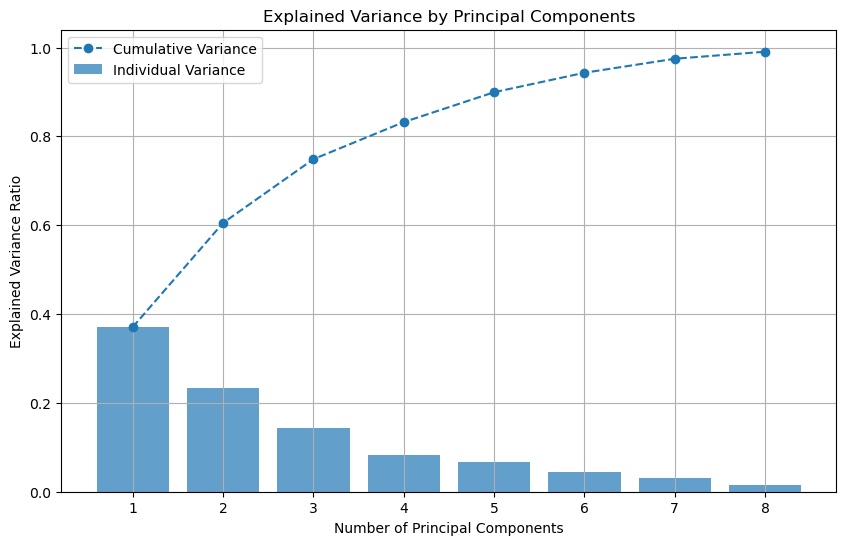

In [78]:
# Standardisation des données
scaler = StandardScaler()
Xtrain_scaled = scaler.fit_transform(X_train)
Xvalid_scaled = scaler.transform(X_valid)
print("Xtrain_scaled shape:", Xtrain_scaled.shape)
print("Xvalid_scaled shape:", Xvalid_scaled.shape)
# Application de la PCA
pca = PCA(n_components=8)
Xtrain = pca.fit_transform(Xtrain_scaled)
Xvalid = pca.transform(Xvalid_scaled)

# Calcul de la variance expliquée cumulée
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Tracé de la variance expliquée
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance, marker='o', linestyle='--', label='Cumulative Variance')
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, label='Individual Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.legend()
plt.grid()
plt.show()

In [ ]:
import optuna
from sklearn.metrics import mean_squared_error

def objective(trial):
    # Define the hyperparameters to tune
    hidden_layer_sizes = tuple(
        trial.suggest_int(f"n_units_layer_{i}", 10, 200) for i in range(trial.suggest_int("n_layers", 1, 3))
    )
    activation = trial.suggest_categorical("activation", ["identity", "logistic", "tanh", "relu"])
    solver = trial.suggest_categorical("solver", ["lbfgs", "sgd", "adam"])
    alpha = trial.suggest_loguniform("alpha", 1e-5, 1e-1)
    learning_rate = trial.suggest_categorical("learning_rate", ["constant", "invscaling", "adaptive"])

    # Initialize the MLPRegressor with the suggested hyperparameters
    mlp = MLPRegressor(
        hidden_layer_sizes=hidden_layer_sizes,
        activation=activation,
        solver=solver,
        alpha=alpha,
        learning_rate=learning_rate,
        max_iter=300,
        random_state=42
    )

    # Train the model
    mlp.fit(Xtrain, y_train)

    # Predict on the validation set
    y_valid_pred = mlp.predict(Xvalid)

    # Calculate the mean squared error
    mse = mean_squared_error(y_valid, y_valid_pred * (y_valid_pred > 0))
    return mse

# Create a study and optimize
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

# Print the best parameters and the corresponding MSE
print("Best parameters:", study.best_params)
print("Best MSE:", study.best_value)

MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=300, random_state=42)

In [93]:
!pip install optuna

   ---------------------------------------- 0.0/383.6 kB ? eta -:--:--
   --------------------------------------- 383.6/383.6 kB 12.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/231.9 kB ? eta -:--:--
   --------------------------------------- 231.9/231.9 kB 13.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/45.8 kB ? eta -:--:--
   ---------------------------------------- 45.8/45.8 kB ? eta 0:00:00
   ---------------------------------------- 0.0/78.5 kB ? eta -:--:--
   ---------------------------------------- 78.5/78.5 kB ? eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.11.0
    Uninstalling typing_extensions-4.11.0:
      Successfully uninstalled typing_extensions-4.11.0


In [ ]:
import optuna
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor

def objective(trial):
    # Define the hyperparameters to tune
    hidden_layer_sizes = tuple(
        trial.suggest_int(f"n_units_layer_{i}", 10, 200) for i in range(trial.suggest_int("n_layers", 1, 3))
    )
    activation = trial.suggest_categorical("activation", ["identity", "logistic", "tanh", "relu"])
    solver = trial.suggest_categorical("solver", ["lbfgs", "sgd", "adam"])
    alpha = trial.suggest_loguniform("alpha", 1e-5, 1e-1)
    learning_rate = trial.suggest_categorical("learning_rate", ["constant", "invscaling", "adaptive"])

    # Initialize the MLPRegressor with the suggested hyperparameters
    mlp = MLPRegressor(
        hidden_layer_sizes=hidden_layer_sizes,
        activation=activation,
        solver=solver,
        alpha=alpha,
        learning_rate=learning_rate,
        max_iter=300,
        random_state=42
    )

    # Train the model
    mlp.fit(Xtrain, y_train)

    # Predict on the validation set
    y_valid_pred = mlp.predict(Xvalid)

    # Calculate the mean squared error
    mse = mean_squared_error(y_valid, y_valid_pred * (y_valid_pred > 0))
    return mse

# Create a study and optimize
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

# Print the best parameters and the corresponding MSE
print("Best parameters:", study.best_params)
print("Best MSE:", study.best_value)

[I 2025-04-13 15:27:48,168] A new study created in memory with name: no-name-6cab99d4-5777-4b06-85e8-62440cb23a6d
C:\Users\Arthur\AppData\Local\Temp\ipykernel_43652\1253712196.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-5, 1e-1)
[I 2025-04-13 15:27:55,431] Trial 0 finished with value: 0.011870681138646982 and parameters: {'n_layers': 1, 'n_units_layer_0': 60, 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.00010681640852974904, 'learning_rate': 'adaptive'}. Best is trial 0 with value: 0.011870681138646982.
C:\Users\Arthur\AppData\Local\Temp\ipykernel_43652\1253712196.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) i

In [ ]:
best_params = {'n_layers': 3, 'n_units_layer_0': 106, 'n_units_layer_1': 65, 'n_units_layer_2': 176, 'activation': 'tanh', 'solver': 'adam', 'alpha': 1.947862643857556e-05, 'learning_rate': 'constant'}
mlp_regressor = MLPRegressor(
    hidden_layer_sizes=study.best_params["hidden_layer_sizes"],
    activation=study.best_params["activation"],
    solver=study.best_params["solver"],
    alpha=study.best_params["alpha"],
    learning_rate=study.best_params["learning_rate"],
    max_iter=300,
    random_state=42
)

In [82]:
X_test_raw = pd.read_csv("data/x_test.csv", index_col="ID")
X_test = scaler.transform(X_test_raw)
X_test = pca.transform(X_test)

In [83]:
y_test = mlp_regressor.predict(X_test)

In [90]:
y_test_pred = y_test*(y_test>0)

In [87]:
X_test_raw

,Humidity,M12,M13,M14,M15,M4,M5,M6,M7,R,S1,S2,S3
ID,,,,,,,,,,,,,
202933,0.869916,0.021914,-0.015737,0.009041,0.015662,-0.139344,-0.041396,-0.006051,0.001638,1.008217,1.000922,1.003093,0.998643
202934,0.904594,-0.100771,-0.040901,0.006137,0.013496,0.843534,0.501194,0.134963,0.024947,1.010621,0.987593,1.003104,1.009033
202935,0.688853,0.703585,1.029723,0.785505,0.293766,-0.536002,-0.166262,-0.029509,-0.015855,1.075560,1.015945,1.038617,1.067383
202936,0.392112,0.648665,0.628007,0.416822,0.065360,-0.309533,-0.398324,-0.269763,-0.269454,1.160165,1.084636,1.011883,1.008619
202937,0.618233,0.155158,0.285085,0.081453,0.031029,-0.801587,-0.709802,-0.279257,-0.089210,1.051850,1.120134,1.003001,1.007571
...,...,...,...,...,...,...,...,...,...,...,...,...,...
337601,0.125975,-0.331484,-0.321498,-0.263797,-0.253773,0.122787,-0.210938,-0.238918,-0.271739,0.979263,1.037649,0.977097,0.981266
337602,0.890504,0.003629,-0.019483,-0.005845,-0.006402,0.055985,0.010018,0.000003,0.004453,1.003115,0.998064,1.004866,1.002534
337603,0.338414,0.171583,0.088718,0.056219,0.025565,0.035663,-0.003033,0.051237,0.030222,1.032341,0.993019,0.986278,1.002453


In [91]:
y_ex = pd.read_csv('data/submission_eg.csv')
submission = pd.DataFrame(y_test_pred, columns=y_ex.columns[1:])
submission.insert(0, 'ID', y_ex['ID'])
submission.to_csv('submission.csv', index=False)